In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define paths for train and test images
train_path = 'C:/Users/catal/OneDrive/Documents/upgrad assignments/CNN_assignment/ISIC/train'
test_path = 'C:/Users/catal/OneDrive/Documents/upgrad assignments/CNN_assignment/ISIC/test'

# Create train and validation dataset with a batch size of 32 and resize images to 180*180
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(180, 180),
        batch_size=32,
        class_mode='categorical',
        subset='training')

validation_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(180, 180),
        batch_size=32,
        class_mode='categorical',
        subset='validation')

# Model building
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(9, activation='softmax')  # 9 output classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model for ~20 epochs
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=20
)

# Findings after model fit
# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Plot training and validation loss over epochs
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 2])
plt.legend(loc='upper right')
plt.show()



Found 1795 images belonging to 9 classes.
Found 444 images belonging to 9 classes.



Epoch 1/20


56/56 [==============================] - 118s 2s/step - loss: 2.0262 - accuracy: 0.2416 - val_loss: 1.9229 - val_accuracy: 0.2115
Epoch 2/20
56/56 [==============================] - 163s 3s/step - loss: 1.7498 - accuracy: 0.3687 - val_loss: 1.6647 - val_accuracy: 0.4038
Epoch 3/20
56/56 [==============================] - 52s 926ms/step - loss: 1.5059 - accuracy: 0.4606 - val_loss: 1.6959 - val_accuracy: 0.4519
Epoch 4/20
56/56 [==============================] - 52s 932ms/step - loss: 1.4734 - accuracy: 0.4736 - val_loss: 1.7979 - val_accuracy: 0.4231
Epoch 5/20
56/56 [==============================] - 63s 1s/step - loss: 1.3631 - accuracy: 0.5122 - val_loss: 1.8434 - val_accuracy: 0.4327
Epoch 6/20
56/56 [==============================] - 58s 1s/step - loss: 1.3310 - accuracy: 0.5417 - val_loss: 1.6717 - val_accuracy: 0.4303
Epoch 7/20
56/56 [==============================] - 52s 921ms/s

NameError: name 'plt' is not defined

In [7]:
pip install tensorflow


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.



  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/93/21/9b035a4f823d6aee2917c75415be9a95861ff3d73a0a65e48edbf210cec1/tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.15.0 from https://files.pythonhosted.org/packages/4c/48/1a5a15517f18eaa4ff8d598b1c000300b20c1bb0e624539d702117a0c369/tensorflow_intel-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
     ---------------------------------------- 0.0/57.5 kB ? eta -:--:--
     ---------------------------------------- 57.

In [2]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


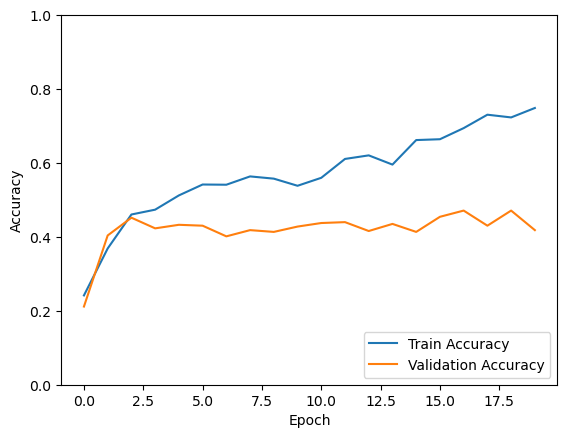

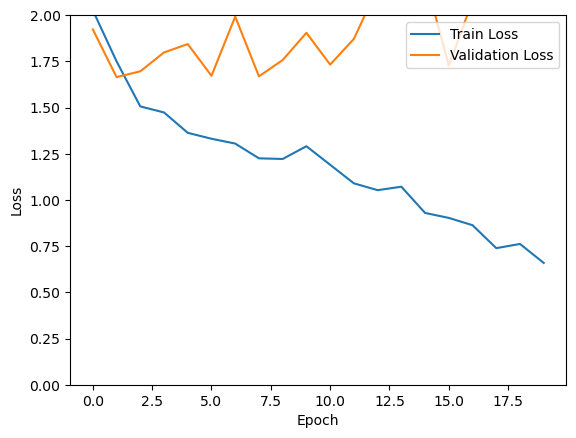

In [3]:
import matplotlib.pyplot as plt
# Findings after model fit
# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Plot training and validation loss over epochs
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 2])
plt.legend(loc='upper right')
plt.show()


In [4]:

# Evaluate model on training data
train_loss, train_accuracy = model.evaluate(train_generator)
print("Training Accuracy:", train_accuracy)

# Evaluate model on testing data
test_loss, test_accuracy = model.evaluate(validation_generator)
print("Testing Accuracy:", test_accuracy)


57/57 [==============================] - 50s 880ms/step - loss: 0.6406 - accuracy: 0.7816
Training Accuracy: 0.7816156148910522
14/14 [==============================] - 262s 20s/step - loss: 2.9416 - accuracy: 0.4122
Testing Accuracy: 0.4121621549129486


In [ ]:

import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define paths for train and test images
train_path = 'C:/Users/catal/OneDrive/Documents/upgrad assignments/CNN_assignment/ISIC/train'
test_path = 'C:/Users/catal/OneDrive/Documents/upgrad assignments/CNN_assignment/ISIC/test'

# Create train and validation dataset with a batch size of 32 and resize images to 180*180
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(180, 180),
        batch_size=32,
        class_mode='categorical',
        subset='training')

validation_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(180, 180),
        batch_size=32,
        class_mode='categorical',
        subset='validation')

# Model building
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(9, activation='softmax')  # 9 output classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model for ~20 epochs
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=20
)

# Findings after model fit
# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy Over Epochs')
plt.show()

# Plot training and validation loss over epochs
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 2])
plt.legend(loc='upper right')
plt.title('Training and Validation Loss Over Epochs')
plt.show()

# Generate accuracies for each class of disease
class_names = train_generator.class_indices.keys()
class_accuracies = {}

# Get predictions on the validation set
predictions = model.predict(validation_generator)
y_true = np.argmax(validation_generator.labels, axis=1)
y_pred = np.argmax(predictions, axis=1)

# Calculate accuracies for each class
for i, class_name in enumerate(class_names):
    class_mask = (y_true == i)
    class_accuracy = np.mean(y_true[class_mask] == y_pred[class_mask])
    class_accuracies[class_name] = class_accuracy

print("Accuracies for each class of disease:")
for class_name, accuracy in class_accuracies.items():
    print(f"{class_name}: {accuracy}")
